In [2]:
import os
import sys
import seaborn as sns
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from hierarchicalforecast.utils import aggregate
from hierarchicalforecast.methods import BottomUp, MinTrace
from hierarchicalforecast.core import HierarchicalReconciliation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from statsmodels.tsa.arima_model import ARIMA

import datetime as dt

import pycountry
import country_converter as coco

rn_con_col_names = ['Country','Code','Year','Other','Solar','Wind','Hydro']
rn_cap_col_names = ['Country','Code','Year','Wind','Hydro','Solar','Other']

rn_con = pd.read_csv('data/modern-renewable-energy-consumption.csv',
                     header=0,
                     names=rn_con_col_names)
rn_cap = pd.read_csv('data/modern-renewable-prod.csv',
                     header=0,
                     names=rn_cap_col_names)

rn_con = rn_con[rn_cap_col_names]
rn_cap = rn_cap[rn_cap_col_names]

rn_con['Continents'] = np.nan
rn_cap['Continents'] = np.nan

# rn_con.drop(columns='Code',inplace=True)
# rn_cap.drop(columns='Code',inplace=True)

rn_con.info()
rn_cap.info()

/Users/ianroberts/opt/miniconda3/lib/python3.8/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


ModuleNotFoundError: No module named 'pycountry'

In [2]:
rn_con.head()

,Country,Year,Wind,Hydro,Solar,Other
0,Africa,1971,0.0,26.013390,0.0,0.164
1,Africa,1972,0.0,29.633196,0.0,0.165
2,Africa,1973,0.0,31.345707,0.0,0.170
3,Africa,1974,0.0,35.667076,0.0,0.175
4,Africa,1975,0.0,37.717968,0.0,0.172


In [3]:
rn_cap.head()

,Country,Year,Wind,Hydro,Solar,Other
0,ASEAN (Ember),2000,0.0,50.37,0.0,22.53
1,ASEAN (Ember),2001,0.0,54.26,0.0,22.42
2,ASEAN (Ember),2002,0.0,53.32,0.0,22.67
3,ASEAN (Ember),2003,0.0,53.28,0.0,22.43
4,ASEAN (Ember),2004,0.0,52.88,0.0,24.14


Get a [list of South American Countries](https://en.wikipedia.org/wiki/List_of_South_American_countries_by_population) from Wikipedia

In South America there are 14 Countries.


In [5]:
# List of South American Countries from Wikipedia
Countries_SA = ['Brazil','Colombia','Argentina','Peru','Venezuela','Chile',
                'Ecuador','Bolivia','Paraguay','Uruguay','Guyana','Suriname',
                'French Guiana','Falkland Islands']
Continent    = 'South America'

print(f"In South America there are {len(Countries_SA)} Countries.")

sa_rn_con    = rn_con[rn_con['Country'].isin(Countries_SA)]
sa_rn_cap    = rn_cap[rn_cap['Country'].isin(Countries_SA)]

SA_rn_con    = rn_con[rn_con['Country']==Continent]
SA_rn_cap    = rn_cap[rn_cap['Country']==Continent]

sa_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
sa_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
SA_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
SA_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)

sa_rn_con.info()
sa_rn_cap.info()
SA_rn_con.info()
SA_rn_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 174 to 231
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  406 non-null    object 
 1   Year     406 non-null    int64  
 2   Wind     274 non-null    float64
 3   Hydro    406 non-null    float64
 4   Solar    252 non-null    float64
 5   Other    349 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 22.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 1143 to 8576
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  552 non-null    object 
 1   Year     552 non-null    int64  
 2   Wind     420 non-null    float64
 3   Hydro    552 non-null    float64
 4   Solar    410 non-null    float64
 5   Other    495 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 30.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/4264350918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/4264350918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/4264350918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/777235716.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in sa_rn_con.groupby(['Country']):
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/777235716.py:25: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in sa_rn_cap.groupby(['Country']):
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/777235716.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To contro

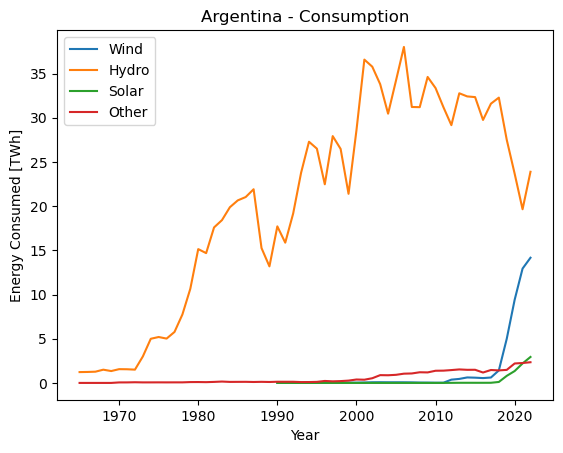

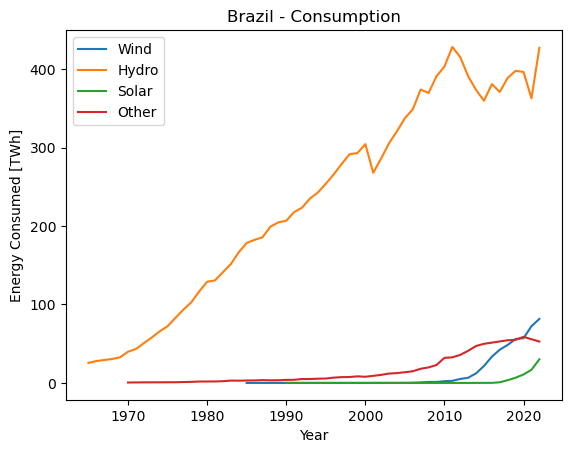

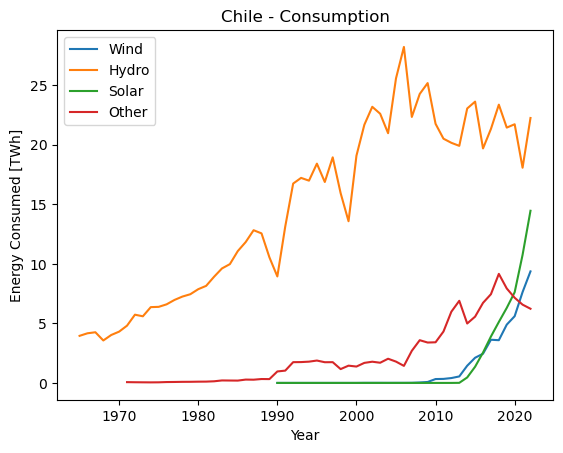

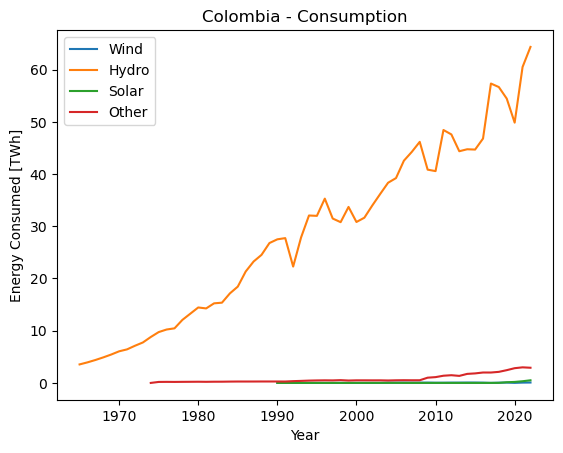

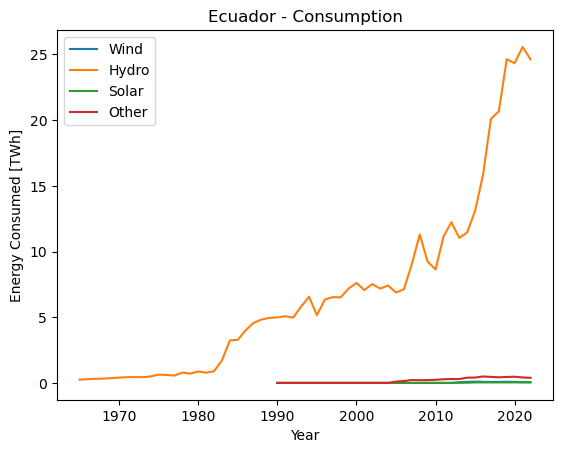

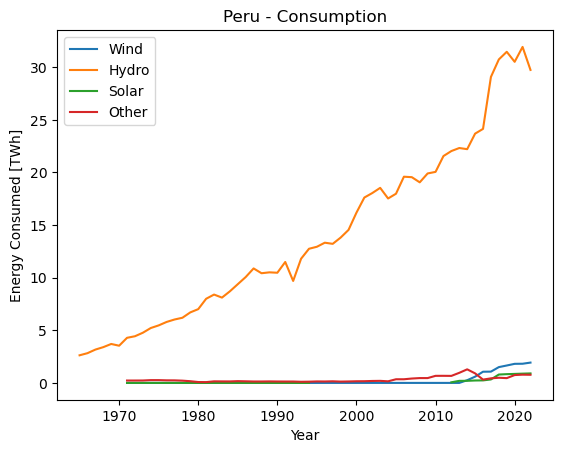

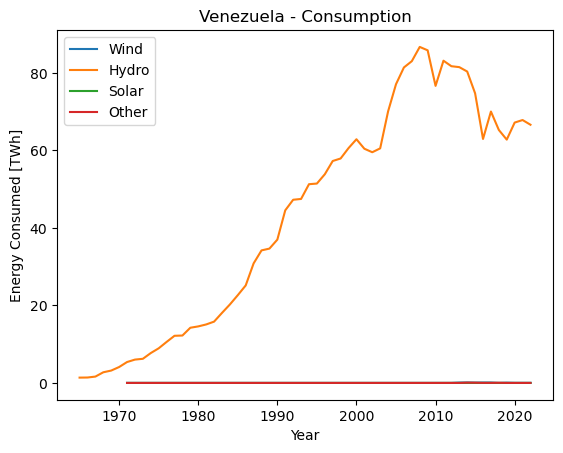

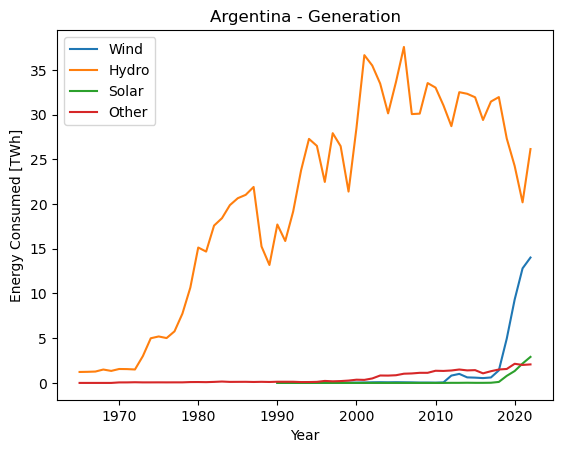

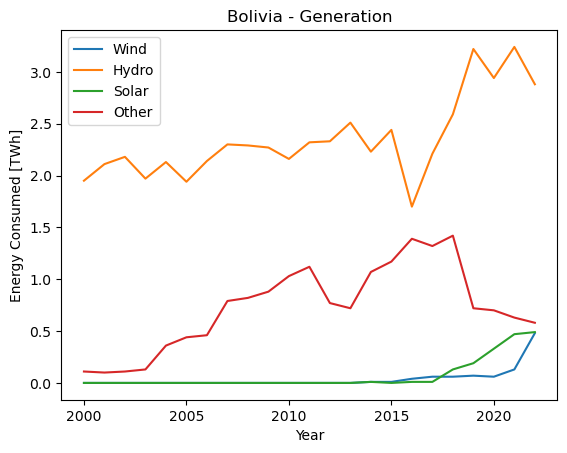

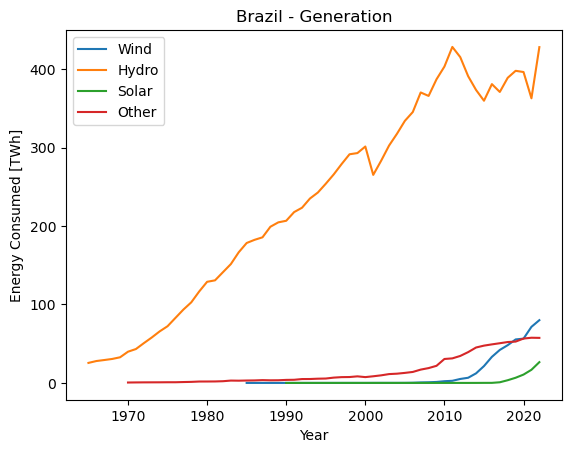

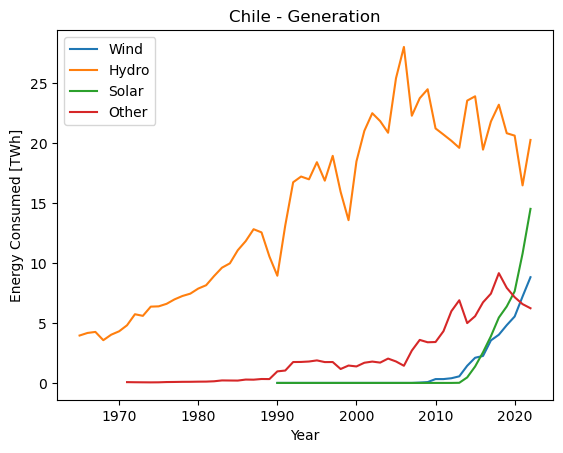

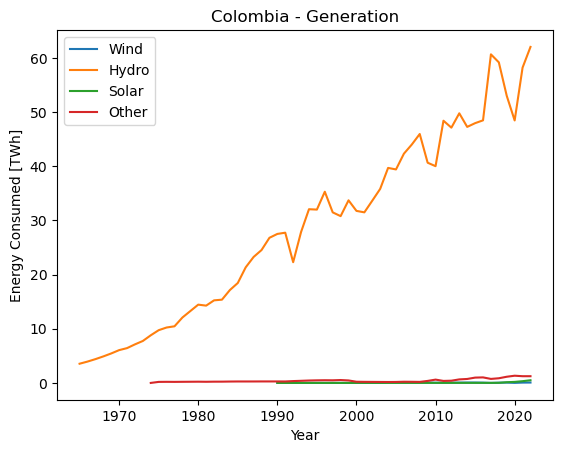

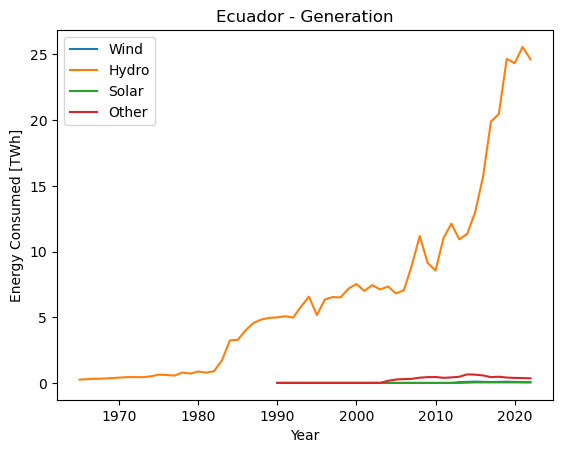

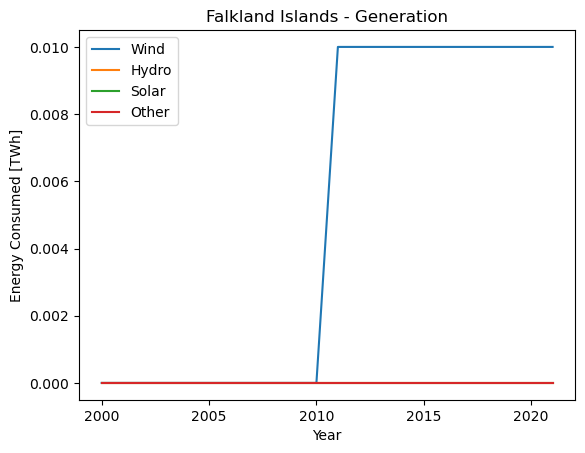

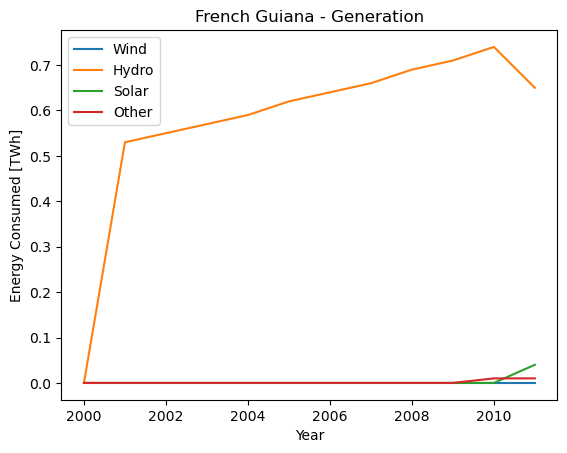

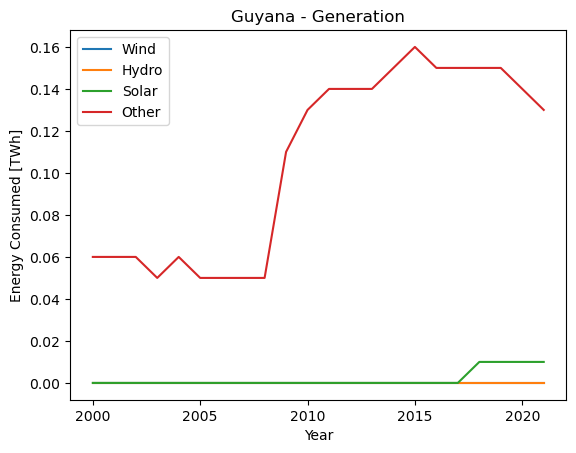

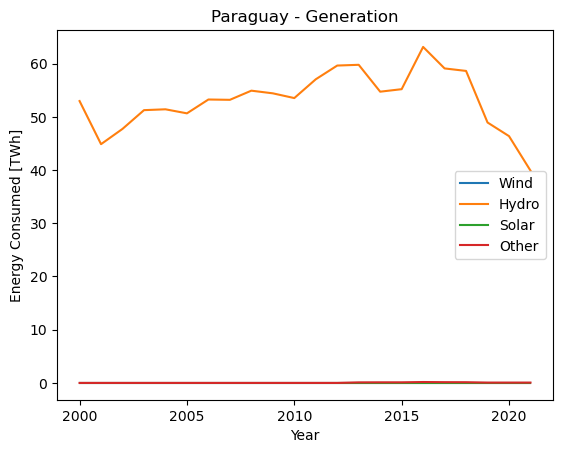

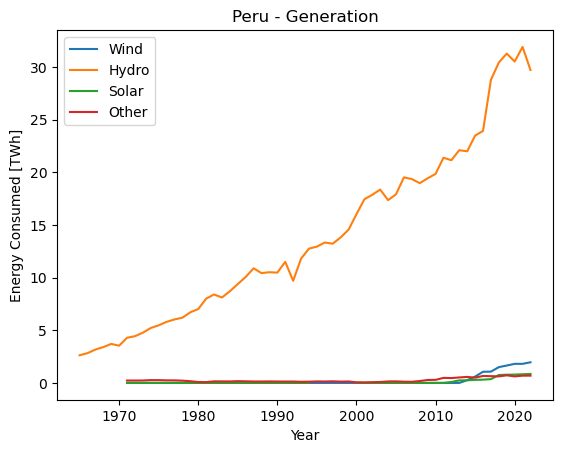

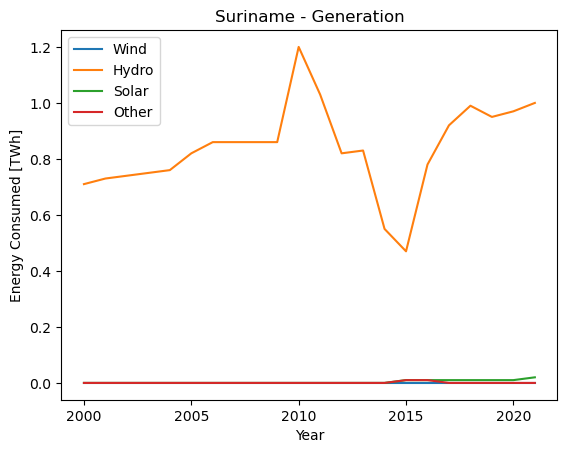

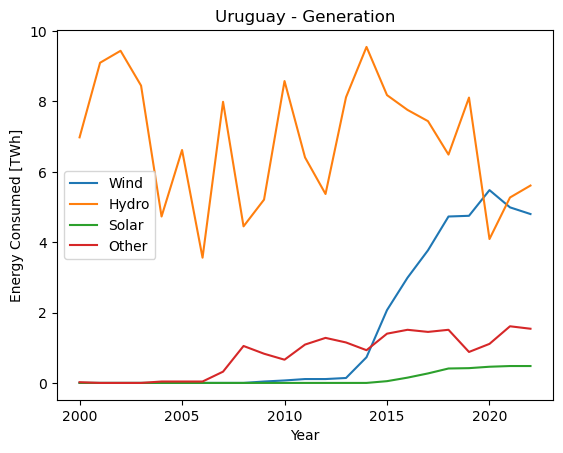

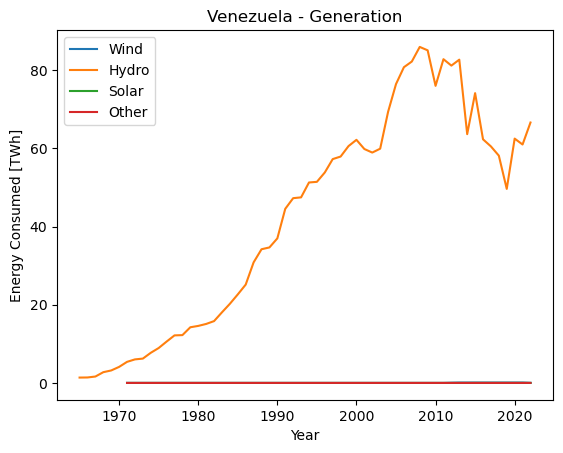

In [6]:
fig_array = []
fig_title = 'South American Energy Consumption by Country'

for title, group in sa_rn_con.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Consumption", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)

with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'South American Energy Consumption by Country'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()

    
fig_array = []
fig_title = 'South American Energy Generation by Country'

for title, group in sa_rn_cap.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Generation", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)
    
with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'South American Energy Generation by Country'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/2529663189.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in SA_rn_con.groupby(['Country']):
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/2529663189.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in SA_rn_cap.groupby(['Country']):


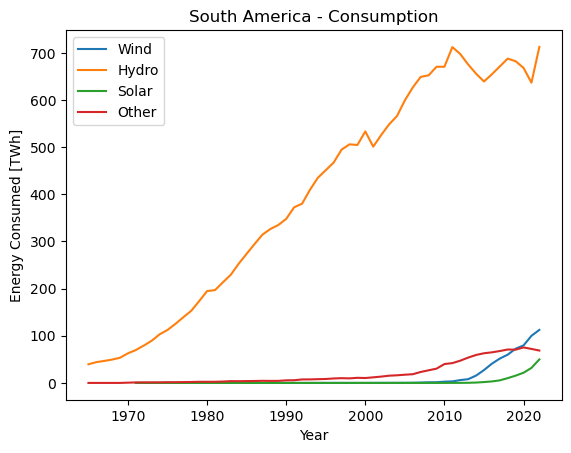

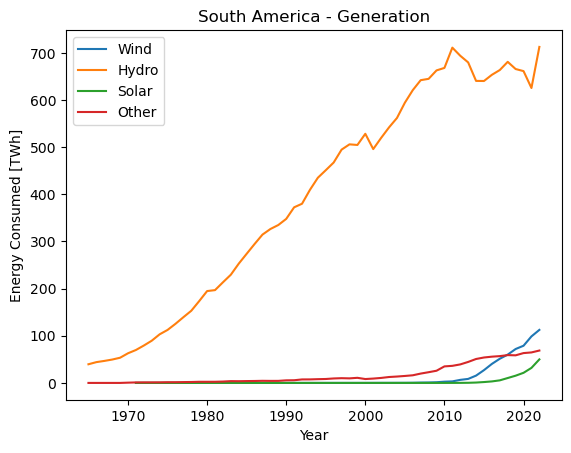

In [7]:
fig_array = []
fig_title = 'South American Energy Generation & Consumption'

for title, group in SA_rn_con.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Consumption", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)

for title, group in SA_rn_cap.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Generation", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)
    
with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'South American Energy Generation & Consumption'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()


In [ ]:
# cap_country_code = pd.DataFrame(coco.convert(names=rn_cap['Country'], to='continent'))
# cap_country_code[country_code=='America'].head(20)
# rn_cap[(cap_country_code=='America')[0]]

In [ ]:
# con_country_code = pd.DataFrame(coco.convert(names=rn_con['Country'].unique(), to='continent'))
# con_country_code[country_code=='America'].head(20)

# North America

In [3]:
data_dir = os.path.join('.', 'data')
consump_file = 'modern-renewable-energy-consumption.csv'
prod_file = 'modern-renewable-prod.csv'

cols = ['country', 'code', 'year', 'other', 'solar', 'wind', 'hydro']

In [4]:
# load energy consumption data
consump = pd.read_csv(os.path.join(data_dir, consump_file), names=cols,
                      header=0)
consump['year'] = pd.to_datetime(consump['year'], format='%Y')
consump = consump.set_index(cols[:3])

consump = consump.melt(ignore_index=False)
consump.columns = ['source', 'consumption']

consump = (consump.reset_index(drop=False)
           .set_index(['country', 'code', 'year', 'source']))


# load energy production data
produce = pd.read_csv(os.path.join(data_dir, prod_file), names=cols, header=0)
produce['year'] = pd.to_datetime(produce['year'], format='%Y')
produce = produce.set_index(cols[:3])

produce = produce.melt(ignore_index=False)
produce.columns = ['source', 'production']

produce = (produce.reset_index(drop=False)
           .set_index(['country', 'code', 'year', 'source']))

# merge consumption and production
dat = pd.merge(consump, produce, how='outer', left_index=True, right_index=True)

# select just north american countries
na_countries = ['Canada', 'Mexico', 'United States']
na = dat[dat.index.isin(na_countries, level=0)]
na

consumption  production
country       code year       source                         
Canada        CAN  1965-01-01 hydro     118.08800         NaN
                              other           NaN         NaN
                              solar           NaN  118.088000
                              wind            NaN         NaN
                   1966-01-01 hydro     131.00000         NaN
...                                           ...         ...
United States USA  2021-01-01 wind      382.01694  164.420000
                   2022-01-01 hydro     258.55110   72.619995
                              other      74.16879  434.810000
                              solar     206.17172  255.970000
                              wind      439.20367  204.290000

[696 rows x 2 columns]

In [5]:
# calculate proportion missing values
na.isna().mean()

consumption    0.156609
production     0.156609
dtype: float64

In [7]:
na_wide = na.unstack(level=[0,1,3])
na_wide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1965-01-01 to 2022-01-01
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (consumption, Canada, CAN, hydro)         58 non-null     float64
 1   (consumption, Canada, CAN, other)         48 non-null     float64
 2   (consumption, Canada, CAN, solar)         33 non-null     float64
 3   (consumption, Canada, CAN, wind)          38 non-null     float64
 4   (consumption, Mexico, MEX, hydro)         58 non-null     float64
 5   (consumption, Mexico, MEX, other)         52 non-null     float64
 6   (consumption, Mexico, MEX, solar)         52 non-null     float64
 7   (consumption, Mexico, MEX, wind)          52 non-null     float64
 8   (consumption, United States, USA, hydro)  58 non-null     float64
 9   (consumption, United States, USA, other)  58 non-null     float64
 10  (consumption, United

In [8]:
# interpolate missing values by backfilling
na_wide.bfill(inplace=True)
na = na_wide.stack(level=[1,2,3])

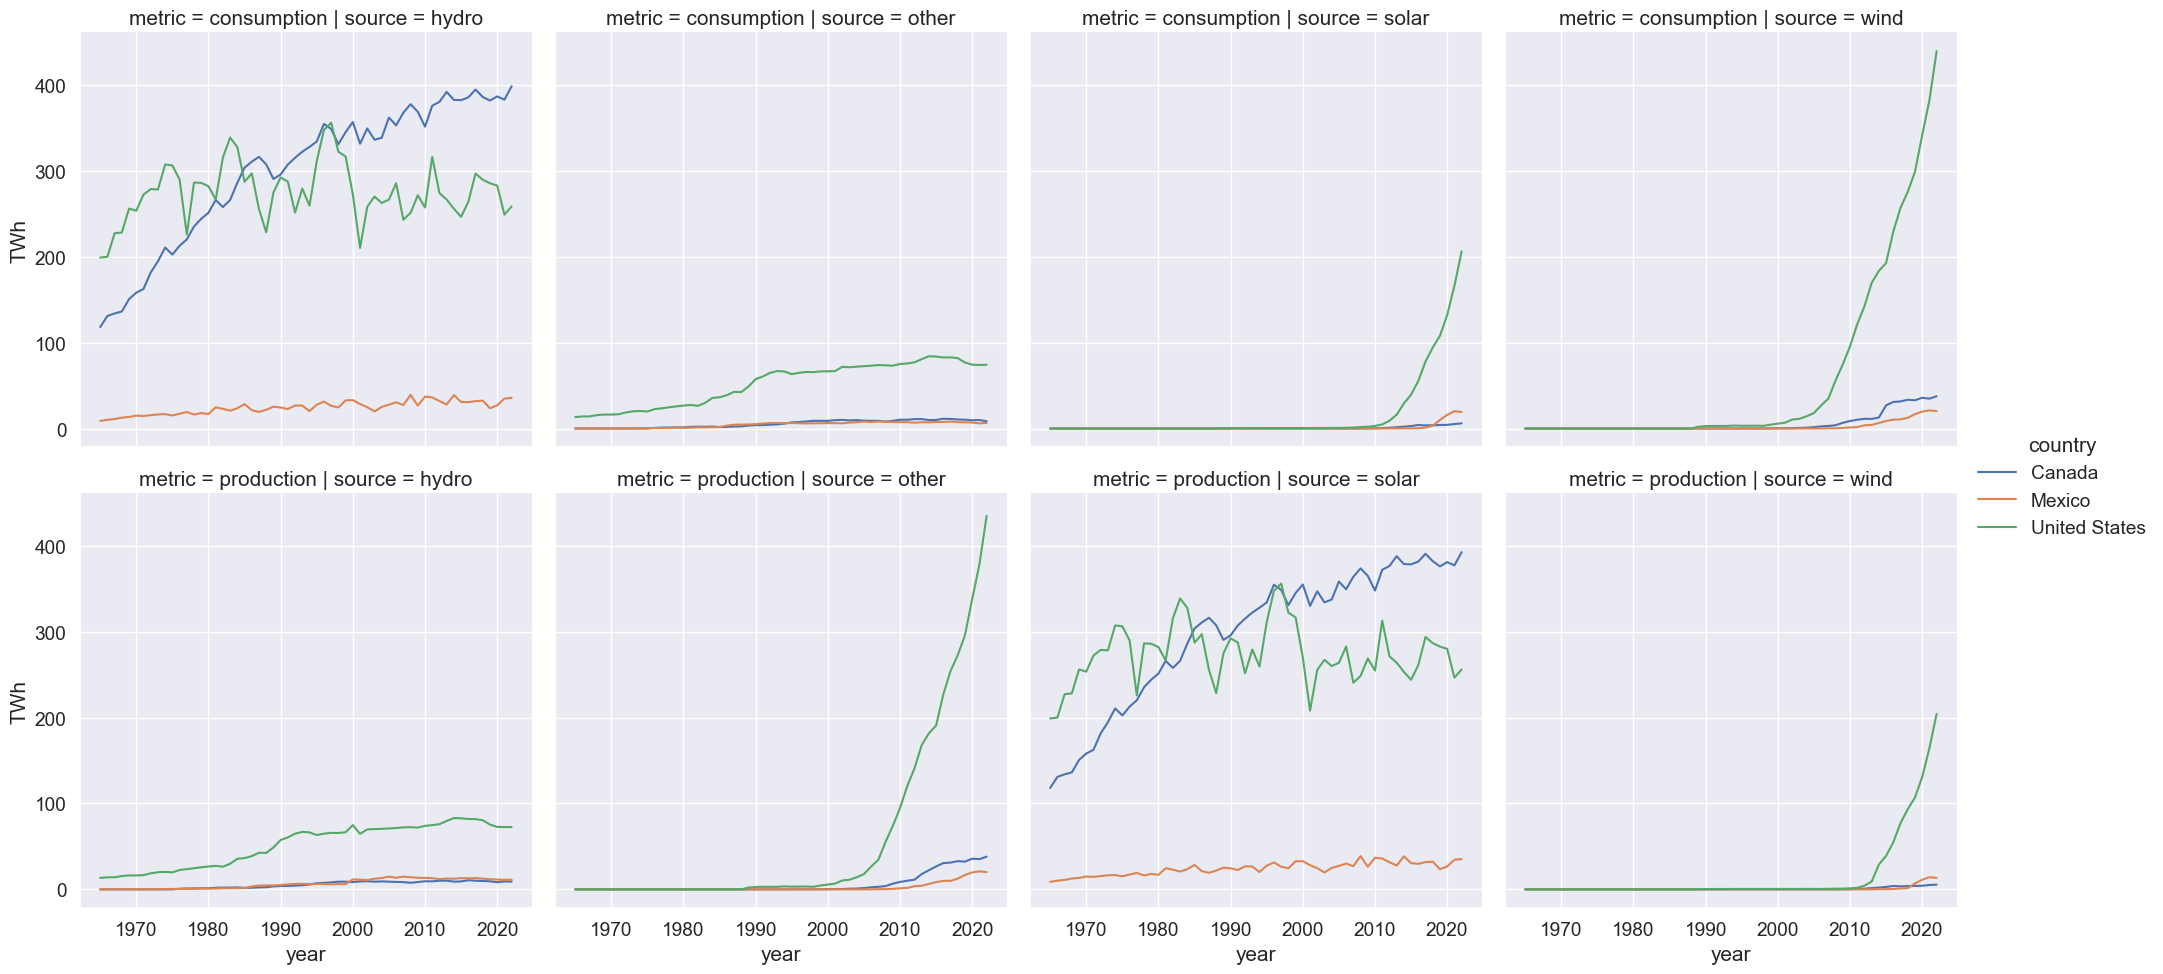

In [9]:
# plot raw energy consumption and production trends
na_long = na.melt(ignore_index=False)
na_long.columns = ['metric', 'TWh']
sns.set(font_scale=1.25)
sns.relplot(data=na_long, x='year', y='TWh', col='source', row='metric',
            hue='country', kind='line')

In [10]:
# fit hierarchical forecast model for renewable energy consumption

na_c = na.reset_index()
na_c.columns = ['ds', 'country', 'code', 'source', 'y', 'production']
na_c = na_c[['country', 'source', 'ds', 'y']]
na_c['metric'] = 'consumption'
na_c = na_c.dropna()

# split into train and test datasets
na_train_c = na_c.loc[na_c['ds'] <= '2015']
na_test_c = na_c.loc[na_c['ds'] > '2015']
h = na_test_c['ds'].nunique()

# define hierarchical structure of model
spec = [['metric'],
        ['metric', 'country'],
        ['metric', 'country', 'source']]

na_train_agg_c, S_train_c, tags_c = aggregate(na_train_c, spec)
na_test_agg_c, _, _ = aggregate(na_test_c, spec)

# fit ARIMA with auto selection of order parameters
na_model_c = StatsForecast(models=[AutoARIMA(seasonal=False, allowdrift=True)],
                           freq='Y', n_jobs=-1)
na_model_c.fit(na_train_agg_c)

# extract forecast predictions (with 95% CI) and fitted values from models
p_c = na_model_c.forecast(h=h, fitted=True, level=[95])
p_fitted_c = na_model_c.forecast_fitted_values()

# correct date so that predictions can be merged with data (not sure why but it 
# gets shifted in the process for some reason)
p_c['ds'] = p_c['ds'] + pd.Timedelta(days=1)

# reconcile forecasts with both a bottom-up and MinT OLS approach
reconcilers = [BottomUp(), 
               MinTrace(method='ols', nonnegative=True)]

rec_model_c = HierarchicalReconciliation(reconcilers=reconcilers)

p_rec_c = rec_model_c.reconcile(Y_hat_df=p_c,
                                Y_df=p_fitted_c, S=S_train_c, tags=tags_c,
                                level=[95])

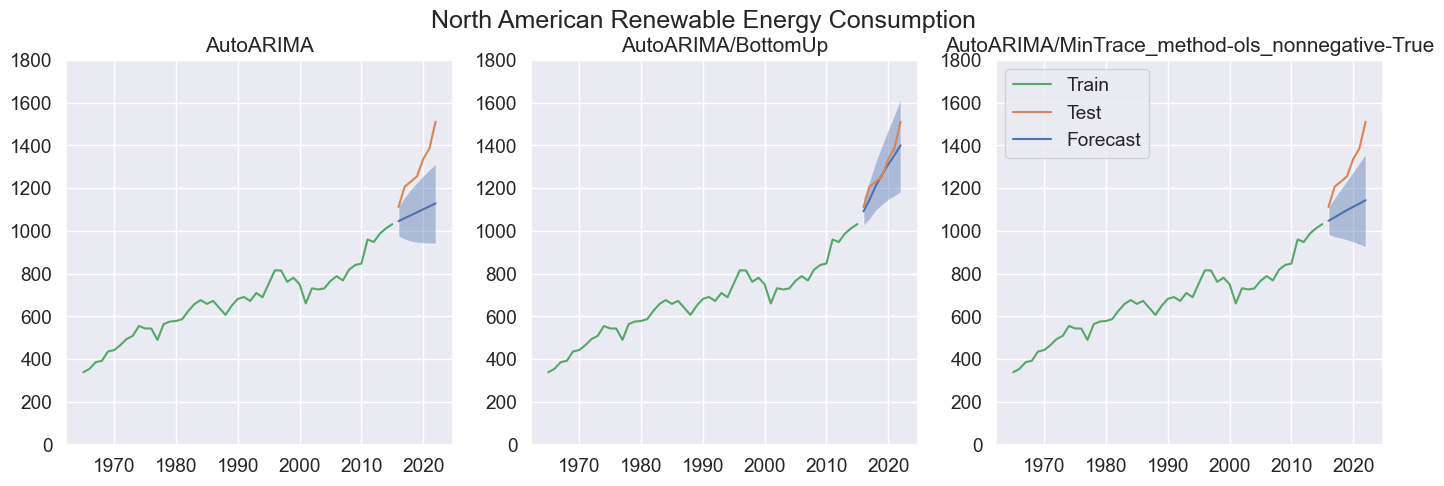

In [11]:
# plot hierarchical north american consumption forecasts

forecast_cols = [['AutoARIMA', 'AutoARIMA-lo-95', 'AutoARIMA-hi-95'],
                 ['AutoARIMA/BottomUp', 'AutoARIMA/BottomUp-lo-95',
                  'AutoARIMA/BottomUp-hi-95'],
                 ['AutoARIMA/MinTrace_method-ols_nonnegative-True',
                  'AutoARIMA/MinTrace_method-ols_nonnegative-True-lo-95',
                  'AutoARIMA/MinTrace_method-ols_nonnegative-True-hi-95']]

fig, axes = plt.subplots(ncols=3, figsize=(17, 5))


for i, ax in enumerate(axes):
    ax.fill_between(p_rec_c.loc[p_rec_c.index == 'consumption', 'ds'],
                    p_rec_c.loc[p_rec_c.index == 'consumption', forecast_cols[i][1]],
                    p_rec_c.loc[p_rec_c.index == 'consumption', forecast_cols[i][2]],
                    alpha=0.4)
    
    l1, = ax.plot(p_rec_c.loc[p_rec_c.index == 'consumption', 'ds'],
            p_rec_c.loc[p_rec_c.index == 'consumption', forecast_cols[i][0]])

    l2, = ax.plot(na_test_agg_c.loc[na_test_agg_c.index == 'consumption', 'ds'],
            na_test_agg_c.loc[na_test_agg_c.index == 'consumption', 'y'])

    l3, = ax.plot(na_train_agg_c.loc[na_train_agg_c.index == 'consumption', 'ds'],
            na_train_agg_c.loc[na_train_agg_c.index == 'consumption', 'y'])

    ax.set_ylim([0, 1800])
    ax.title.set_text(forecast_cols[i][0])

plt.legend([l3, l2, l1], ['Train', 'Test', 'Forecast'])
fig.suptitle('North American Renewable Energy Consumption')
plt.show()

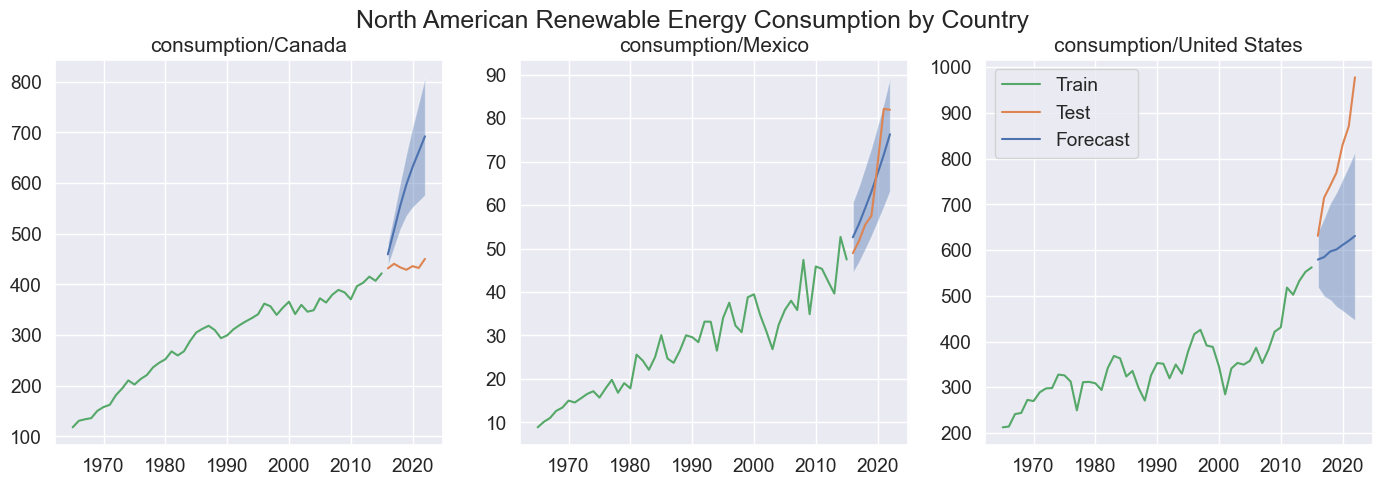

In [12]:
# plot hierarchical consumption forecasts by country

plot_levels = ['consumption/Canada', 'consumption/Mexico',
               'consumption/United States']

fig, axes = plt.subplots(ncols=3, figsize=(17, 5))

for i, ax in enumerate(axes):
    ax.fill_between(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-lo-95'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-hi-95'],
                    alpha=0.4)
    
    l1, = ax.plot(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
            p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp'])

    l2, = ax.plot(na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'ds'],
            na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'y'])

    l3, = ax.plot(na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'ds'],
            na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'y'])

    ax.title.set_text(plot_levels[i])

plt.legend([l3, l2, l1], ['Train', 'Test', 'Forecast'])
fig.suptitle('North American Renewable Energy Consumption by Country')
plt.show()

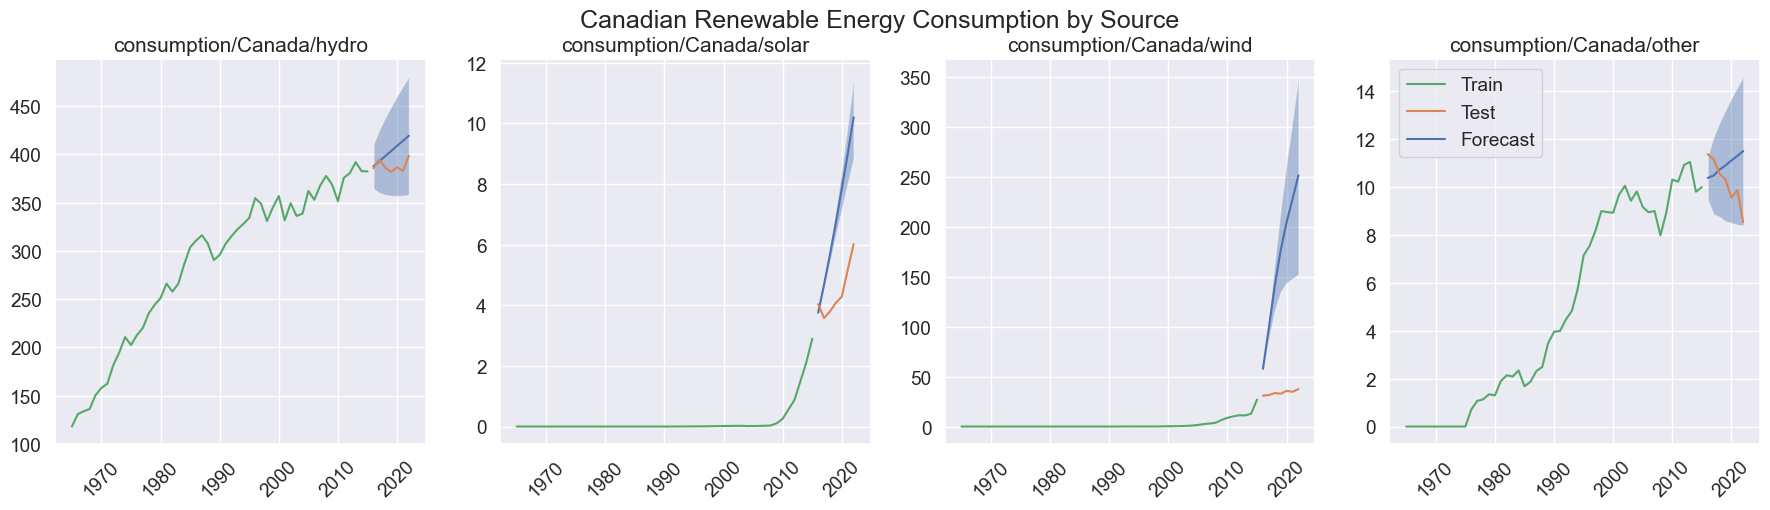

In [13]:
# plot hierarchical consumption forecasts for Canada by source

plot_levels = ['consumption/Canada/hydro', 'consumption/Canada/solar',
               'consumption/Canada/wind', 'consumption/Canada/other']

fig, axes = plt.subplots(ncols=4, figsize=(22, 5))

for i, ax in enumerate(axes):
    ax.fill_between(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-lo-95'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-hi-95'],
                    alpha=0.4)
    
    l1, = ax.plot(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
            p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp'])

    l2, = ax.plot(na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'ds'],
            na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'y'])

    l3, = ax.plot(na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'ds'],
            na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'y'])

#     ax.set_ylim([0, 600])
    ax.title.set_text(plot_levels[i])
    ax.tick_params('x', labelrotation=45)

plt.legend([l3, l2, l1], ['Train', 'Test', 'Forecast'])
fig.suptitle('Canadian Renewable Energy Consumption by Source')
plt.show()

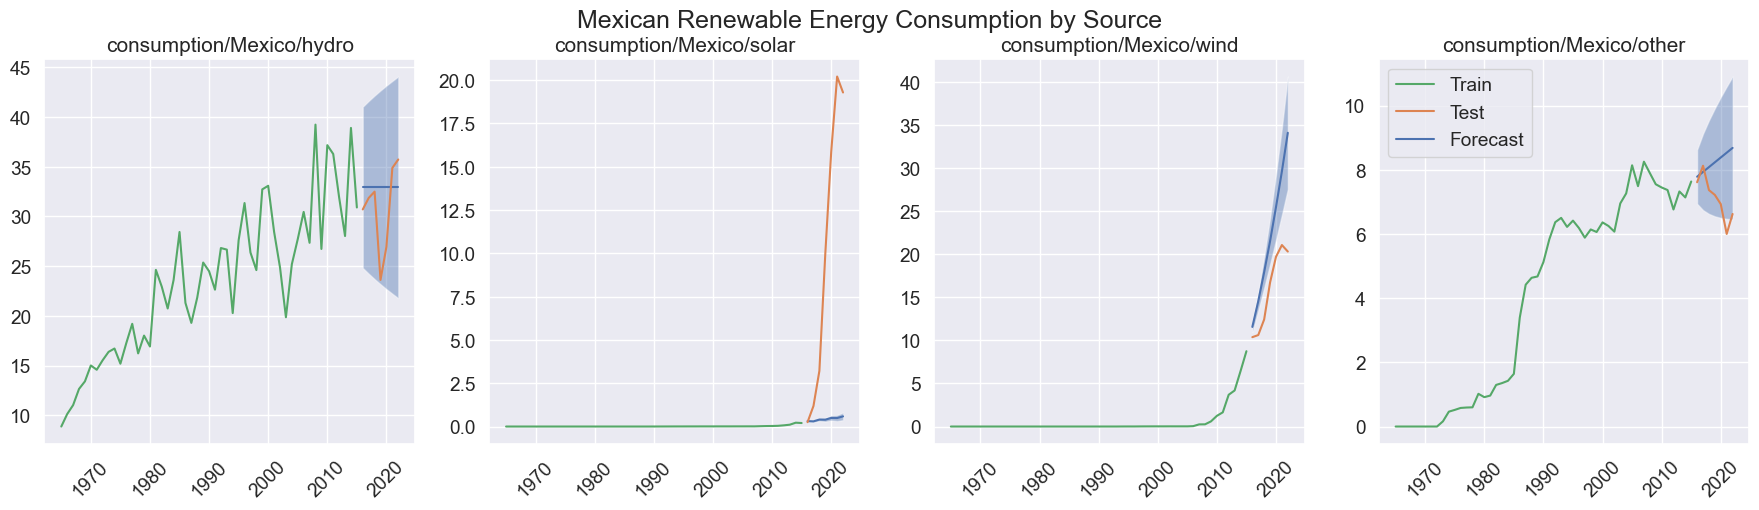

In [14]:
# plot hierarchical consumption forecasts for Mexico by source

plot_levels = ['consumption/Mexico/hydro', 'consumption/Mexico/solar',
               'consumption/Mexico/wind', 'consumption/Mexico/other']

fig, axes = plt.subplots(ncols=4, figsize=(22, 5))

for i, ax in enumerate(axes):
    ax.fill_between(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-lo-95'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-hi-95'],
                    alpha=0.4)
    
    l1, = ax.plot(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
            p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp'])

    l2, = ax.plot(na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'ds'],
            na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'y'])

    l3, = ax.plot(na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'ds'],
            na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'y'])

#     ax.set_ylim([0, 600])
    ax.title.set_text(plot_levels[i])
    ax.tick_params('x', labelrotation=45)

plt.legend([l3, l2, l1], ['Train', 'Test', 'Forecast'])
fig.suptitle('Mexican Renewable Energy Consumption by Source')
plt.show()

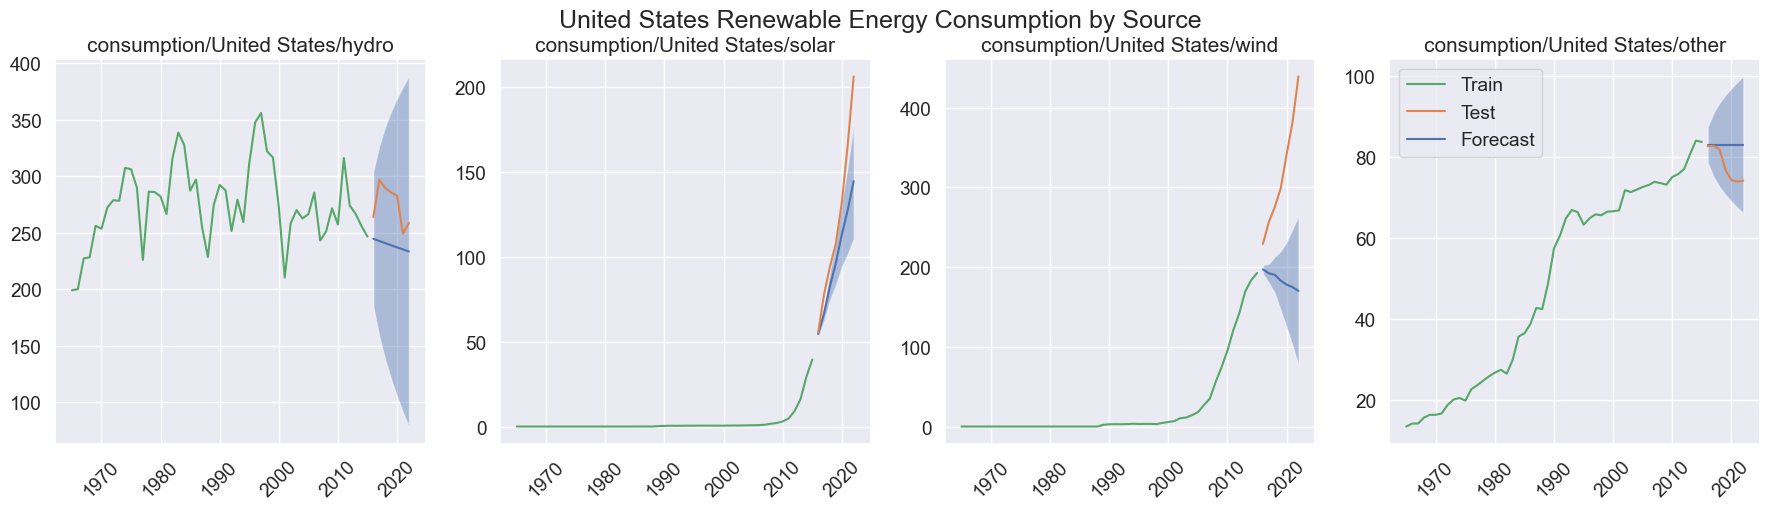

In [15]:
# plot hierarchical consumption forecasts for United States by source

plot_levels = ['consumption/United States/hydro', 'consumption/United States/solar',
               'consumption/United States/wind', 'consumption/United States/other']

fig, axes = plt.subplots(ncols=4, figsize=(22, 5))

for i, ax in enumerate(axes):
    ax.fill_between(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-lo-95'],
                    p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp-hi-95'],
                    alpha=0.4)
    
    l1, = ax.plot(p_rec_c.loc[p_rec_c.index == plot_levels[i], 'ds'],
            p_rec_c.loc[p_rec_c.index == plot_levels[i], 'AutoARIMA/BottomUp'])

    l2, = ax.plot(na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'ds'],
            na_test_agg_c.loc[na_test_agg_c.index == plot_levels[i], 'y'])

    l3, = ax.plot(na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'ds'],
            na_train_agg_c.loc[na_train_agg_c.index == plot_levels[i], 'y'])

#     ax.set_ylim([0, 600])
    ax.title.set_text(plot_levels[i])
    ax.tick_params('x', labelrotation=45)

plt.legend([l3, l2, l1], ['Train', 'Test', 'Forecast'])
fig.suptitle('United States Renewable Energy Consumption by Source')
plt.show()

In [16]:
# fit hierarchical forecast model for renewable energy production

na_p = na.reset_index()
na_p.columns = ['ds', 'country', 'code', 'source', 'consumption', 'y']
na_p = na_p[['country', 'source', 'ds', 'y']]
na_p['metric'] = 'production'
na_p = na_p.dropna()

# split into train and test datasets
na_train_p = na_p.loc[na_p['ds'] <= '2015']
na_test_p = na_p.loc[na_p['ds'] > '2015']
h = na_test_p['ds'].nunique()

# define hierarchical structure of model
spec = [['metric'],
        ['metric', 'country'],
        ['metric', 'country', 'source']]

na_train_agg_p, S_train_p, tags_p = aggregate(na_train_p, spec)
na_test_agg_p, _, _ = aggregate(na_test_p, spec)

# fit ARIMA with auto selection of order parameters
na_model_p = StatsForecast(models=[AutoARIMA(seasonal=False, allowdrift=True)],
                           freq='Y', n_jobs=-1)
na_model_p.fit(na_train_agg_p)

# extract forecast predictions (with 95% CI) and fitted values from models
p_p = na_model_p.forecast(h=h, fitted=True, level=[95])
p_fitted_p = na_model_p.forecast_fitted_values()

# correct date so that predictions can be merged with data (not sure why but it 
# gets shifted in the process for some reason)
p_p['ds'] = p_p['ds'] + pd.Timedelta(days=1)

# reconcile forecasts with both a bottom-up and MinT OLS approach
reconcilers = [BottomUp(), 
               MinTrace(method='ols', nonnegative=True)]

rec_model_p = HierarchicalReconciliation(reconcilers=reconcilers)

p_rec_p = rec_model_p.reconcile(Y_hat_df=p_p,
                                Y_df=p_fitted_p, S=S_train_p, tags=tags_p,
                                level=[95])

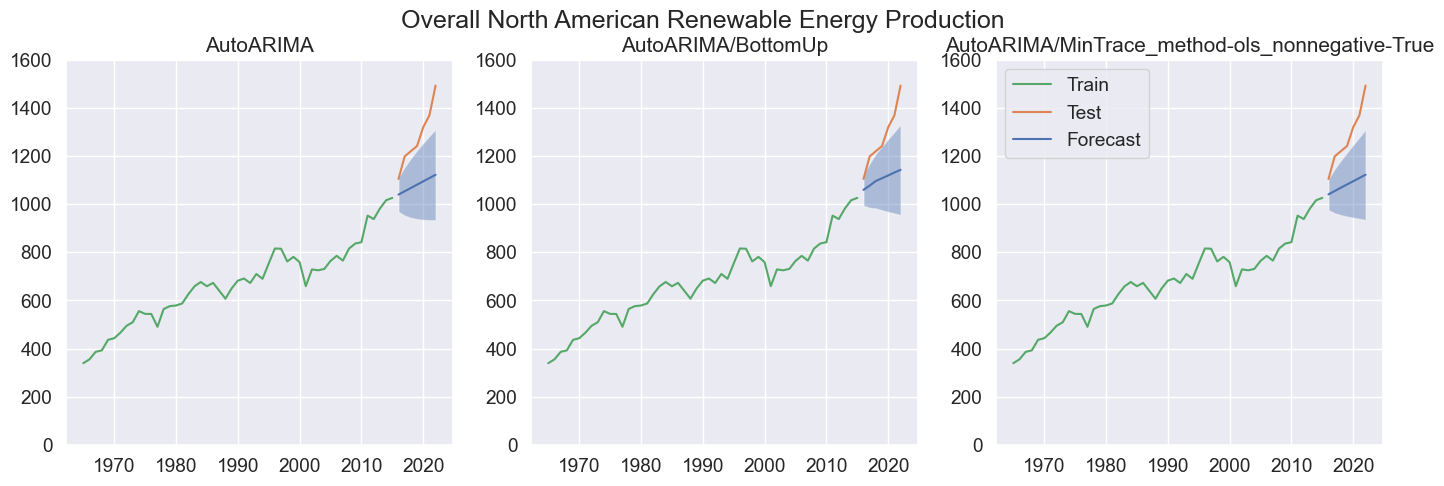

In [17]:
# plot north american production forecasts
na_train_agg_p['dataset'] = 'Train'
na_test_agg_p['dataset'] = 'Test'
p_rec_p['dataset'] = 'Forecast'

forecast_cols = [['AutoARIMA', 'AutoARIMA-lo-95', 'AutoARIMA-hi-95'],
                 ['AutoARIMA/BottomUp', 'AutoARIMA/BottomUp-lo-95',
                  'AutoARIMA/BottomUp-hi-95'],
                 ['AutoARIMA/MinTrace_method-ols_nonnegative-True',
                  'AutoARIMA/MinTrace_method-ols_nonnegative-True-lo-95',
                  'AutoARIMA/MinTrace_method-ols_nonnegative-True-hi-95']]

fig, axes = plt.subplots(ncols=3, figsize=(17, 5))


for i, ax in enumerate(axes):
    ax.fill_between(p_rec_p.loc[p_rec_p.index == 'production', 'ds'],
                    p_rec_p.loc[p_rec_p.index == 'production', forecast_cols[i][1]],
                    p_rec_p.loc[p_rec_p.index == 'production', forecast_cols[i][2]],
                    alpha=0.4)
    
    l1, = ax.plot(p_rec_p.loc[p_rec_p.index == 'production', 'ds'],
                  p_rec_p.loc[p_rec_p.index == 'production', forecast_cols[i][0]])

    l2, = ax.plot(na_test_agg_p.loc[na_test_agg_p.index == 'production', 'ds'],
                  na_test_agg_p.loc[na_test_agg_p.index == 'production', 'y'])

    l3, = ax.plot(na_train_agg_p.loc[na_train_agg_p.index == 'production', 'ds'],
                  na_train_agg_p.loc[na_train_agg_p.index == 'production', 'y'])

    ax.set_ylim([0, 1600])
    ax.title.set_text(forecast_cols[i][0])

plt.legend([l3, l2, l1], ['Train', 'Test', 'Forecast'])
fig.suptitle('Overall North American Renewable Energy Production')
plt.show()

In [ ]:
# Europe Analysis

modern_renewable_energy_prod = pd.read_csv('./data/modern-renewable-prod.csv')
modern_renewable_energy_cons = pd.read_csv('./data/modern-renewable-energy-consumption.csv')

europe_production = modern_renewable_energy_prod[modern_renewable_energy_prod['Entity'] == 'Europe']
europe_consumption = modern_renewable_energy_cons[modern_renewable_energy_cons['Entity'] == 'Europe']

europe_production = europe_production.drop(['Code', 'Entity'], axis=1)
europe_consumption = europe_consumption.drop(['Code', 'Entity'], axis=1)


consumption_columns = [
    'Year',
    'Other renewables (including geothermal and biomass) electricity generation - TWh',
    'Solar generation - TWh',
    'Wind generation - TWh',
    'Hydro generation - TWh'
]
production_columns = ['Year', 'Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

# Plotting energy consumption trends over the years
plt.figure(figsize=(10, 6))
for col in consumption_columns[1:]:
    plt.plot(europe_consumption['Year'], europe_consumption[col], label=col)

plt.title('Energy Consumption Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting energy production trends over the years
plt.figure(figsize=(10, 6))
for col in production_columns[1:]:
    plt.plot(europe_production['Year'], europe_production[col], label=col)

plt.title('Energy Production Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()







In [ ]:
# ARIMA model forecast on europe energy production data
# from statsmodels.tsa.arima.model import ARIMA

# Convert 'Year' column to datetime format
europe_production['Year'] = pd.to_datetime(europe_production['Year'], format='%Y')

# Set 'Year' column as the index
europe_production = europe_production.set_index('Year')

# List of energy types
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

# Loop through each energy type for forecasting
for energy_type in energy_types:
    # Selecting and preparing data for the specific energy type
    data = europe_production[[energy_type]].copy()

    # Splitting the data into train and test sets
    train_data = data[data.index.year < 2020]
    test_data = data[data.index.year >= 2020]

    # Fitting the ARIMA model
    model = ARIMA(train_data, order=(5, 1, 0)) 
    fitted_model = model.fit()

    # Forecasting for future values
    test_forecast = fitted_model.forecast(steps=len(test_data))

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[energy_type], label='Training Data')
    plt.plot(test_data.index, test_data[energy_type], label='Actual Data')
    plt.plot(test_data.index, test_forecast, label='ARIMA Forecast Test', color='red')
    plt.title(f'{energy_type} Forecast using ARIMA')
    plt.xlabel('Year')
    plt.ylabel(f'{energy_type}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #next decade forcast
    next_decade_forecast = fitted_model.forecast(steps=10)
    print(next_decade_forecast)
    
    years = [idx.year for idx in next_decade_forecast.index]
    forecast_values = next_decade_forecast.values

    # Plotting the forecasted values for the next decade with years on x-axis
    plt.figure(figsize=(10, 6))
    plt.plot(years, forecast_values, marker='o', linestyle='-', color='red')  # Plot forecast

    plt.title('Next Decade Forecast')
    plt.xlabel('Year')
    plt.ylabel('Forecasted Values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# ARIMA model forecast on consumption data
# from statsmodels.tsa.arima.model import ARIMA

# Convert 'Year' column to datetime format
europe_consumption['Year'] = pd.to_datetime(europe_consumption['Year'], format='%Y')

# Set 'Year' column as the index
europe_consumption = europe_consumption.set_index('Year')

# List of energy types
energy_types = ['Other renewables (including geothermal and biomass) electricity generation - TWh',
    'Solar generation - TWh',
    'Wind generation - TWh',
    'Hydro generation - TWh']

# Loop through each energy type for forecasting
for energy_type in energy_types:
    # Selecting and preparing data for the specific energy type
    data = europe_consumption[[energy_type]].copy()

    # Splitting the data into train and test sets
    train_data = data[data.index.year < 2020]
    test_data = data[data.index.year >= 2020]

    # Fitting the ARIMA model
    model = ARIMA(train_data, order=(5, 1, 0)) 
    fitted_model = model.fit()

    # Forecasting for future values
    test_forecast = fitted_model.forecast(steps=len(test_data))

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[energy_type], label='Training Data')
    plt.plot(test_data.index, test_data[energy_type], label='Actual Data')
    plt.plot(test_data.index, test_forecast, label='ARIMA Forecast Test', color='red')
    plt.title(f'{energy_type} Forecast using ARIMA')
    plt.xlabel('Year')
    plt.ylabel(f'{energy_type}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #next decade forcast
    next_decade_forecast = fitted_model.forecast(steps=10)
    print(next_decade_forecast)
    
    years = [idx.year for idx in next_decade_forecast.index]
    forecast_values = next_decade_forecast.values

    # Plotting the forecasted values for the next decade with years on x-axis
    plt.figure(figsize=(10, 6))
    plt.plot(years, forecast_values, marker='o', linestyle='-', color='red')  # Plot forecast

    plt.title('Next Decade Forecast')
    plt.xlabel('Year')
    plt.ylabel('Forecasted Values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()